#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep
* L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.
* L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.

#### Imports

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

#### Column Defination
* sr = Snoring Range
* rr =  respiration rate,
* t = body temperature,
* lm = limb movement rate,
* bo = blood oxygen levels,
* rem =  eye movement,
* sr.1 = number of hours of sleep,
* hr =  heart rate 
* sl =  Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

In [2]:
df = pd.read_csv("SaYoPillow.csv")
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


#### Options
SVC, GNB, Dicesiontree

In [3]:
df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [4]:
X = df.drop("sl", axis=1)
y = df["sl"]

In [16]:
y.value_counts()

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64

In [6]:
clfs = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC()
}

In [59]:
clf_acc_r1 = {}
clf_store_r1 = {}
clf_y_test_r1 = {}
clf_y_preds_r1 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)
                dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r1[key] = accuracy
        clf_store_r1[key] = dt
        clf_y_test_r1[key] = y_test
        clf_y_preds_r1[key] = y_preds

In [60]:
pd.DataFrame([clf_acc_r1])

,RF,DT,SVC
0,0.982143,0.988095,0.900794


In [61]:
clf_store_r1

{'RF': RandomForestClassifier(), 'DT': DecisionTreeClassifier(), 'SVC': SVC()}

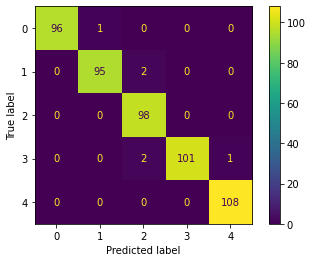

In [62]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["DT"], y_pred= clf_y_preds_r1["DT"]);

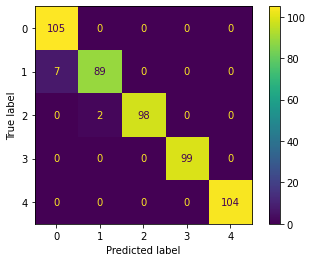

In [63]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["RF"], y_pred= clf_y_preds_r1["RF"]);

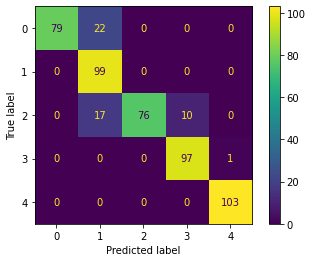

In [64]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["SVC"], y_pred= clf_y_preds_r1["SVC"]);

In [54]:
# rf_clf = clf_store_r1["RF"]
# dt_clf = clf_store_r1["DT"]
# svc_clf = clf_store_r1["SVC"]

In [44]:
clf_acc_r2 = {}
clf_store_r2 = {}
clf_y_test_r2 = {}
clf_y_preds_r2 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
                dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r2[key] = accuracy
        clf_store_r2[key] = dt
        clf_y_test_r2[key] = y_test
        clf_y_preds_r2[key] = y_preds

In [45]:
pd.DataFrame([clf_acc_r2])

,RF,DT,SVC
0,0.993651,0.990476,0.961905


In [46]:
clf_store_r2

{'RF': RandomForestClassifier(), 'DT': DecisionTreeClassifier(), 'SVC': SVC()}

In [53]:
# rf_clf = clf_store_r2["RF"]
# dt_clf = clf_store_r2["DT"]
# svc_clf = clf_store_r2["SVC"]

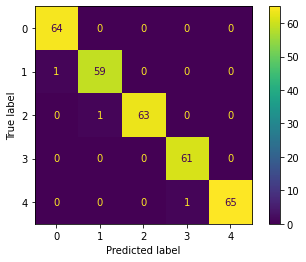

In [49]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["DT"], y_pred= clf_y_preds_r2["DT"]);

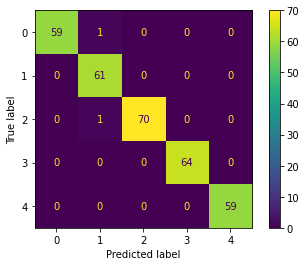

In [50]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["RF"], y_pred= clf_y_preds_r2["RF"]);

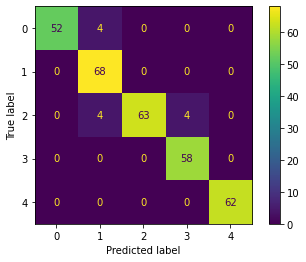

In [52]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["SVC"], y_pred= clf_y_preds_r2["SVC"]);
